In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib.colors as colors
from mpl_toolkits import mplot3d
import pandas as pd
from scipy import stats

import cmocean

In [2]:
import schwarzcalc as sc

## Compare radius of micromotion

In [24]:
# voltages
'''
Simulation: barium++ (MBa = 136, Q=2) in helium (K0 = 3.93782 cm^2/V/s), P = 100 mbar (76 torr), Ep = 10 V/cm,
Vrf = [50V-150V], pitch = 0.16 mm, gap = 0.08 mm, RF frequency = 13.56 MHz, 4-phase, viscous drag
'''
d76torr_v50 = pd.read_csv('Radii/trajectory_p76_V50_Ep10-He.csv')
d76torr_v75 = pd.read_csv('Radii/trajectory_p76_V75_Ep10-He.csv')
d76torr_v100 = pd.read_csv('Radii/trajectory_p76_V100_Ep10-He.csv')
d76torr_v125 = pd.read_csv('Radii/trajectory_p76_V125_Ep10-He.csv')
d76torr_v150 = pd.read_csv('Radii/trajectory_p76_V150_Ep10-He.csv')

In [25]:
# pressures
'''
Simulation: barium++ (MBa = 136, Q=2) in helium (K0 = 3.93782 cm^2/V/s), P = [200mbar-1bar] ([152torr-760torr]), Ep = 10 V/cm,
Vrf = 150 V, pitch = 0.16 mm, gap = 0.08 mm, RF frequency = 13.56 MHz, 4-phase, viscous drag
'''
d150v_p152 = pd.read_csv('Radii/trajectory_p152_V150_Ep10-He.csv')
d150v_p304 = pd.read_csv('Radii/trajectory_p304_V150_Ep10-He.csv')
d150v_p456 = pd.read_csv('Radii/trajectory_p456_V150_Ep10-He.csv')
d150v_p608 = pd.read_csv('Radii/trajectory_p608_V150_Ep10-He.csv')
d150v_p760 = pd.read_csv('Radii/trajectory_p760_V150_Ep10-He.csv')

## Get average loop radius

### Voltages

(-17.486, -17.476)

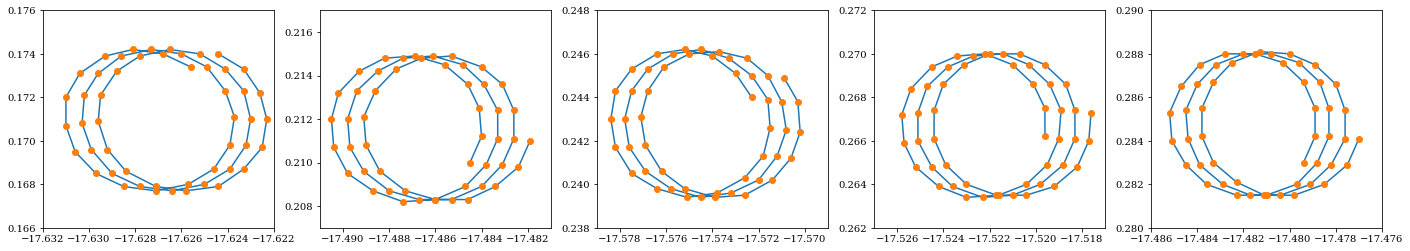

In [26]:
fig, axes = plt.subplots(1,5,figsize=(24,4))
axes[0].plot(d76torr_v50['Z'][100000:100050], (40 - d76torr_v50['X'][100000:100050]))
axes[0].plot(d76torr_v50['Z'][100000:100050], (40 - d76torr_v50['X'][100000:100050]), 'o')
axes[0].set_ylim(0.166,0.176)
axes[0].set_xlim(-17.632,-17.622)

axes[1].plot(d76torr_v75['Z'][100000:100050], (40 - d76torr_v75['X'][100000:100050]))
axes[1].plot(d76torr_v75['Z'][100000:100050], (40 - d76torr_v75['X'][100000:100050]), 'o')
axes[1].set_ylim(0.207,0.217)
axes[1].set_xlim(-17.491,-17.481)

axes[2].plot(d76torr_v100['Z'][100000:100050], (40 - d76torr_v100['X'][100000:100050]))
axes[2].plot(d76torr_v100['Z'][100000:100050], (40 - d76torr_v100['X'][100000:100050]), 'o')
axes[2].set_ylim(0.238,0.248)
axes[2].set_xlim(-17.579,-17.569)

axes[3].plot(d76torr_v125['Z'][100000:100050], (40 - d76torr_v125['X'][100000:100050]))
axes[3].plot(d76torr_v125['Z'][100000:100050], (40 - d76torr_v125['X'][100000:100050]), 'o')
axes[3].set_ylim(0.262,0.272)
axes[3].set_xlim(-17.527,-17.517)
 
axes[4].plot(d76torr_v150['Z'][100000:100050], (40 - d76torr_v150['X'][100000:100050]))
axes[4].plot(d76torr_v150['Z'][100000:100050], (40 - d76torr_v150['X'][100000:100050]), 'o')
axes[4].set_ylim(0.280,0.290)
axes[4].set_xlim(-17.486,-17.476)

In [27]:
voltages = np.array([50, 75, 100, 125, 150])
rads_76torr = []
rads_76torr.append(np.sqrt((d76torr_v50['X'][100000:150000].values - d76torr_v50['X'][100008:150008].values)**2 + (d76torr_v50['Z'][100000:150000].values - d76torr_v50['Z'][100008:150008].values)**2).mean())
rads_76torr.append(np.sqrt((d76torr_v75['X'][100000:150000].values - d76torr_v75['X'][100008:150008].values)**2 + (d76torr_v75['Z'][100000:150000].values - d76torr_v75['Z'][100008:150008].values)**2).mean())
rads_76torr.append(np.sqrt((d76torr_v100['X'][100000:150000].values - d76torr_v100['X'][100008:150008].values)**2 + (d76torr_v100['Z'][100000:150000].values - d76torr_v100['Z'][100008:150008].values)**2).mean())
rads_76torr.append(np.sqrt((d76torr_v125['X'][100000:150000].values - d76torr_v125['X'][100008:150008].values)**2 + (d76torr_v125['Z'][100000:150000].values - d76torr_v125['Z'][100008:150008].values)**2).mean())
rads_76torr.append(np.sqrt((d76torr_v150['X'][100000:150000].values - d76torr_v150['X'][100008:150008].values)**2 + (d76torr_v150['Z'][100000:150000].values - d76torr_v150['Z'][100008:150008].values)**2).mean())
rads_76torr = np.array(rads_76torr)

rads_76torr_std = []
rads_76torr_std.append(np.sqrt((d76torr_v50['X'][100000:150000].values - d76torr_v50['X'][100008:150008].values)**2 + (d76torr_v50['Z'][100000:150000].values - d76torr_v50['Z'][100008:150008].values)**2).std())
rads_76torr_std.append(np.sqrt((d76torr_v75['X'][100000:150000].values - d76torr_v75['X'][100008:150008].values)**2 + (d76torr_v75['Z'][100000:150000].values - d76torr_v75['Z'][100008:150008].values)**2).std())
rads_76torr_std.append(np.sqrt((d76torr_v100['X'][100000:150000].values - d76torr_v100['X'][100008:150008].values)**2 + (d76torr_v100['Z'][100000:150000].values - d76torr_v100['Z'][100008:150008].values)**2).std())
rads_76torr_std.append(np.sqrt((d76torr_v125['X'][100000:150000].values - d76torr_v125['X'][100008:150008].values)**2 + (d76torr_v125['Z'][100000:150000].values - d76torr_v125['Z'][100008:150008].values)**2).std())
rads_76torr_std.append(np.sqrt((d76torr_v150['X'][100000:150000].values - d76torr_v150['X'][100008:150008].values)**2 + (d76torr_v150['Z'][100000:150000].values - d76torr_v150['Z'][100008:150008].values)**2).std())
rads_76torr_std = np.array(rads_76torr_std)

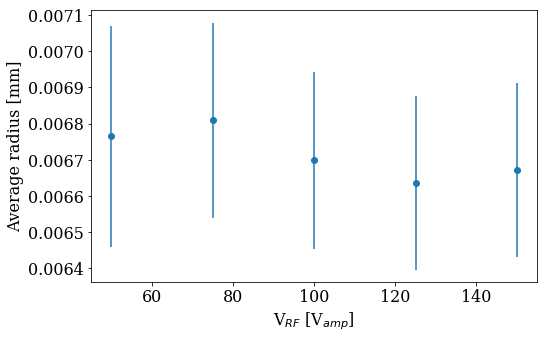

In [33]:
plt.figure(figsize=(8,5))

plt.errorbar(voltages, rads_76torr, yerr=rads_76torr_std, fmt='o')

plt.tick_params(which='major', axis='both', labelsize=16);
plt.xlabel('V$_{RF}$ [V$_{amp}$]', fontsize=16);
plt.ylabel('Average radius [mm]', fontsize=16);

### Pressures

In [34]:
# pressures
d150v_p152 = pd.read_csv('Radii/trajectory_p152_V150_Ep10-He.csv')
d150v_p304 = pd.read_csv('Radii/trajectory_p304_V150_Ep10-He.csv')
d150v_p456 = pd.read_csv('Radii/trajectory_p456_V150_Ep10-He.csv')
d150v_p608 = pd.read_csv('Radii/trajectory_p608_V150_Ep10-He.csv')
d150v_p760 = pd.read_csv('Radii/trajectory_p760_V150_Ep10-He.csv')

In [35]:
pressures = np.array([152, 304, 456, 608, 760])
rads_150v = []
rads_150v.append(np.sqrt((d150v_p152['X'][200000:300000].values - d150v_p152['X'][200008:300008].values)**2 + (d150v_p152['Z'][200000:300000].values - d150v_p152['Z'][200008:300008].values)**2).mean())
rads_150v.append(np.sqrt((d150v_p304['X'][300000:400000].values - d150v_p304['X'][300008:400008].values)**2 + (d150v_p304['Z'][300000:400000].values - d150v_p304['Z'][300008:400008].values)**2).mean())
rads_150v.append(np.sqrt((d150v_p456['X'][500000:600000].values - d150v_p456['X'][500008:600008].values)**2 + (d150v_p456['Z'][500000:600000].values - d150v_p456['Z'][500008:600008].values)**2).mean())
rads_150v.append(np.sqrt((d150v_p608['X'][700000:800000].values - d150v_p608['X'][700008:800008].values)**2 + (d150v_p608['Z'][700000:800000].values - d150v_p608['Z'][700008:800008].values)**2).mean())
rads_150v.append(np.sqrt((d150v_p760['X'][1100000:1200000].values - d150v_p760['X'][1100008:1200008].values)**2 + (d150v_p760['Z'][1100000:1200000].values - d150v_p760['Z'][1100008:1200008].values)**2).mean())
rads_150v = np.array(rads_150v)

rads_150v_std = []
rads_150v_std.append(np.sqrt((d150v_p152['X'][200000:300000].values - d150v_p152['X'][200008:300008].values)**2 + (d150v_p152['Z'][200000:300000].values - d150v_p152['Z'][200008:300008].values)**2).std())
rads_150v_std.append(np.sqrt((d150v_p304['X'][300000:400000].values - d150v_p304['X'][300008:400008].values)**2 + (d150v_p304['Z'][300000:400000].values - d150v_p304['Z'][300008:400008].values)**2).std())
rads_150v_std.append(np.sqrt((d150v_p456['X'][500000:600000].values - d150v_p456['X'][500008:600008].values)**2 + (d150v_p456['Z'][500000:600000].values - d150v_p456['Z'][500008:600008].values)**2).std())
rads_150v_std.append(np.sqrt((d150v_p608['X'][700000:800000].values - d150v_p608['X'][700008:800008].values)**2 + (d150v_p608['Z'][700000:800000].values - d150v_p608['Z'][700008:800008].values)**2).std())
rads_150v_std.append(np.sqrt((d150v_p760['X'][1100000:1200000].values - d150v_p760['X'][1100008:1200008].values)**2 + (d150v_p760['Z'][1100000:1200000].values - d150v_p760['Z'][1100008:1200008].values)**2).std())
rads_150v_std = np.array(rads_150v_std)

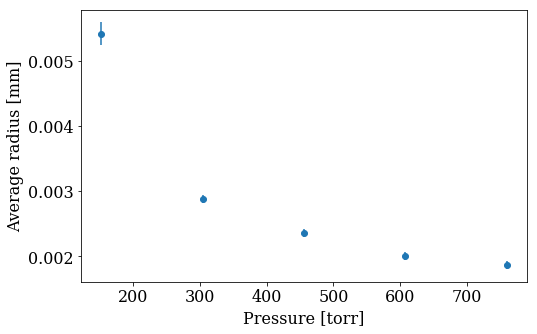

In [36]:
plt.figure(figsize=(8,5))

plt.errorbar(pressures, rads_150v, yerr=rads_150v_std, fmt='o')

plt.tick_params(which='major', axis='both', labelsize=16);
plt.xlabel('Pressure [torr]', fontsize=16);
plt.ylabel('Average radius [mm]', fontsize=16);

# Schwarz ymin vs. ion position

In [3]:
# pressures / Vrf
'''
Simulation: barium++ (MBa = 136, Q=2) in helium (K0 = 3.93782 cm^2/V/s), P = [200mbar-1bar] ([152torr-760torr]), Ep = 30V/cm
Vrf = [100V,150V,200V], pitch = 0.16 mm, gap = 0.08 mm, RF frequency = 13.56 MHz, 4-phase, viscous drag
'''
d100v_p152_Ep30 = pd.read_csv('CompareEpP/trajectory_p152_V100_Ep30-He.csv')
d100v_p304_Ep30 = pd.read_csv('CompareEpP/trajectory_p304_V100_Ep30-He.csv')
d100v_p456_Ep30 = pd.read_csv('CompareEpP/trajectory_p456_V100_Ep30-He.csv')
d100v_p608_Ep30 = pd.read_csv('CompareEpP/trajectory_p608_V100_Ep30-He.csv')
d100v_p760_Ep30 = pd.read_csv('CompareEpP/trajectory_p760_V100_Ep30-He.csv')

d150v_p152_Ep30 = pd.read_csv('CompareEpP/trajectory_p152_V150_Ep30-He.csv')
d150v_p304_Ep30 = pd.read_csv('CompareEpP/trajectory_p304_V150_Ep30-He.csv')
d150v_p456_Ep30 = pd.read_csv('CompareEpP/trajectory_p456_V150_Ep30-He.csv')
d150v_p608_Ep30 = pd.read_csv('CompareEpP/trajectory_p608_V150_Ep30-He.csv')
d150v_p760_Ep30 = pd.read_csv('CompareEpP/trajectory_p760_V150_Ep30-He.csv')

d200v_p152_Ep30 = pd.read_csv('CompareEpP/trajectory_p152_V200_Ep30-He.csv')
d200v_p304_Ep30 = pd.read_csv('CompareEpP/trajectory_p304_V200_Ep30-He.csv')
d200v_p456_Ep30 = pd.read_csv('CompareEpP/trajectory_p456_V200_Ep30-He.csv')
d200v_p608_Ep30 = pd.read_csv('CompareEpP/trajectory_p608_V200_Ep30-He.csv')
d200v_p760_Ep30 = pd.read_csv('CompareEpP/trajectory_p760_V200_Ep30-He.csv')

In [4]:
ymin_he_100v_ep30 = []
ymin_he_100v_ep30.append((40 - d100v_p152_Ep30['X'][200:1000]).mean())
ymin_he_100v_ep30.append((40 - d100v_p304_Ep30['X'][500:1500]).mean())
ymin_he_100v_ep30.append((40 - d100v_p456_Ep30['X'][1000:3000]).mean())
ymin_he_100v_ep30.append((40 - d100v_p608_Ep30['X'][2000:5000]).mean())
ymin_he_100v_ep30.append((40 - d100v_p760_Ep30['X'][2000:6000]).mean())
ymin_he_100v_ep30 = np.array(ymin_he_100v_ep30)

In [5]:
ymin_he_150v_ep30 = []
ymin_he_150v_ep30.append((40 - d150v_p152_Ep30['X'][200:1000]).mean())
ymin_he_150v_ep30.append((40 - d150v_p304_Ep30['X'][500:1500]).mean())
ymin_he_150v_ep30.append((40 - d150v_p456_Ep30['X'][1000:3000]).mean())
ymin_he_150v_ep30.append((40 - d150v_p608_Ep30['X'][2000:5000]).mean())
ymin_he_150v_ep30.append((40 - d150v_p760_Ep30['X'][2000:6000]).mean())
ymin_he_150v_ep30 = np.array(ymin_he_150v_ep30)

In [6]:
ymin_he_200v_ep30 = []
ymin_he_200v_ep30.append((40 - d200v_p152_Ep30['X'][200:1000]).mean())
ymin_he_200v_ep30.append((40 - d200v_p304_Ep30['X'][500:1500]).mean())
ymin_he_200v_ep30.append((40 - d200v_p456_Ep30['X'][1000:3000]).mean())
ymin_he_200v_ep30.append((40 - d200v_p608_Ep30['X'][1000:5000]).mean())
ymin_he_200v_ep30.append((40 - d200v_p760_Ep30['X'][2000:6000]).mean())
ymin_he_200v_ep30 = np.array(ymin_he_200v_ep30)

### Get expected ymin

In [7]:
pressures = np.array([152, 304, 456, 608, 760])
K0 = 3.93782e2
Q = 2
mBa = 136
Ep = 3
Vrf = 100
pp0 = 0.1

rfc = sc.RFCarpet(K0, Q, mBa, pp0, Vrf, Ep)

yminSchwarz_v100 = []
rfc.vrf = 100
for p in pressures:
    rfc.pp0 = p/760
    rfc.recalc_vars()
    yminSchwarz_v100.append(rfc.ymin(nphase=4))
yminSchwarz_v100 = np.array(yminSchwarz_v100)

yminSchwarz_v150 = []
rfc.vrf = 150
for p in pressures:
    rfc.pp0 = p/760
    rfc.recalc_vars()
    yminSchwarz_v150.append(rfc.ymin(nphase=4))
yminSchwarz_v150 = np.array(yminSchwarz_v150)

yminSchwarz_v200 = []
rfc.vrf = 200
for p in pressures:
    rfc.pp0 = p/760
    rfc.recalc_vars()
    yminSchwarz_v200.append(rfc.ymin(nphase=4))
yminSchwarz_v200 = np.array(yminSchwarz_v200)

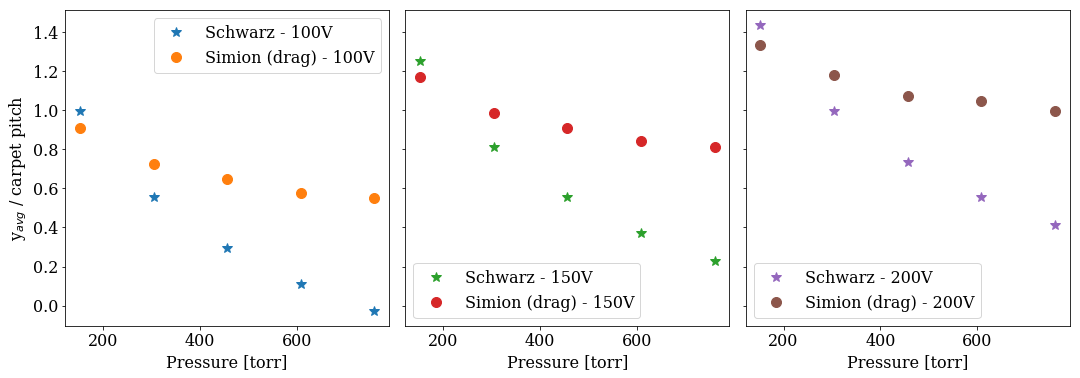

In [23]:
fig, axes = plt.subplots(1,3,figsize=(18,6), sharey=True, sharex=True)
fig.subplots_adjust(bottom=0.15, wspace=0.05)

axes[0].plot(pressures, yminSchwarz_v100/rfc.pitch, '*', ms=10, c='C0', label='Schwarz - 100V');
axes[0].plot(pressures, ymin_he_100v_ep30/rfc.pitch, 'o', ms=10, c='C1', label='Simion (drag) - 100V');
axes[1].plot(pressures, yminSchwarz_v150/rfc.pitch, '*', ms=10, c='C2', label='Schwarz - 150V');
axes[1].plot(pressures, ymin_he_150v_ep30/rfc.pitch, 'o', ms=10, c='C3', label='Simion (drag) - 150V');
axes[2].plot(pressures, yminSchwarz_v200/rfc.pitch, '*', ms=10, c='C4', label='Schwarz - 200V');
axes[2].plot(pressures, ymin_he_200v_ep30/rfc.pitch, 'o', ms=10, c='C5', label='Simion (drag) - 200V');

#plt.tick_params(which='major', axis='both', labelsize=16)
axes[0].set_xlabel('Pressure [torr]', fontsize=16)
axes[1].set_xlabel('Pressure [torr]', fontsize=16)
axes[2].set_xlabel('Pressure [torr]', fontsize=16)
axes[0].set_ylabel('y$_{avg}$ / carpet pitch', fontsize=16)

axes[0].legend(loc='upper right', frameon=True, fontsize=16)
axes[1].legend(loc='lower left', frameon=True, fontsize=16)
axes[2].legend(loc='lower left', frameon=True, fontsize=16)

axes[0].tick_params(which='major', axis='both', labelsize=16)
axes[1].tick_params(which='major', axis='both', labelsize=16)
axes[2].tick_params(which='major', axis='both', labelsize=16)